<a href="https://colab.research.google.com/github/SinghNavnoor/Food-Sales-Predictions/blob/main/food_sales_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Need a Readme Part on Github.

# **Regression – Prediction of Grocery Sales**
- **Author:** Navnoor Singh Kahlon
- **Last updated:** October 2022
---



## **Loading Data**

In [331]:
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

In [332]:
filename = '/content/sales_predictions.csv'
df = pd.read_csv(filename)

In [333]:
df.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228


In [334]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


Looks like there are null values in Item_weight and Outlet_size

##**Data Cleaning**

####Number of rows and columns

In [335]:
len(df)

8523

In [336]:
len(df.columns)

12

####Data types of each variable 

In [337]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

####Duplicates

In [338]:
df.duplicated().sum()

0

No duplicates found

####Identifying Missing Values

In [339]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

####Looking at the Item_Weight column, I will be using the mean to fill the null values. 

In [340]:
item_weight_ave = df['Item_Weight'].mean()

item_weight_ave

12.857645184135976

In [341]:
df['Item_Weight'].fillna(item_weight_ave, inplace = True)

####Analyzing the Outlet_Size column

In [342]:
df['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

The Outlet_Size column is an object type. 
It has 2410 null values.
The best way to fill these null values will be using Machine Learning.
For now I will be filling it with .mode() just so that we don't have any null values. 

In [343]:
df['Outlet_Size'].fillna('Medium', inplace = True)

####Confirming that there are no missing values. 

In [344]:
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

####Looking for any inconsistencies with the columns. 

In [345]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

Focusing on every object type columns to see for any inconsistencies. 

Column: Item_Fat_Content 

In [346]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [347]:
all_columns = df.columns
data_types = df.dtypes

for i in all_columns:
  if df[i].dtypes == object:
    print(f'The count values for {i} are:')
    print(df[i].value_counts())
    print('-----------------------------------------------')
    print('\n')
    

The count values for Item_Identifier are:
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64
-----------------------------------------------


The count values for Item_Fat_Content are:
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64
-----------------------------------------------


The count values for Item_Type are:
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64


#####Found inconsistencies with the naming of the Fat Contents like: Low Fat, LF, low fat, reg and regular. These need to be the same. 

#####Fixing the inconsistencies

In [348]:
df.replace({'Item_Fat_Content': {'LF':'Low Fat',
                                 'low fat': 'Low Fat',
                                 'reg': 'Regular'}}, inplace = True)

In [349]:
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

####Getting summary stats of each Numerical column. 

In [350]:
from termcolor import colored

for i in all_columns:
  if df[i].dtypes == float:
    m = df[i].mean().round(2)
    max = df[i].max().round(2)
    min = df[i].min().round(2)
    mode = df[i].mode()
    print(colored(f"The {df[i].name}:", attrs=['bold']))
    #print(f"The {df[i].name}:")
    print(f'Mean = {m}, Max = {max}, Min = {min}')
    print('--------------' * 4)
    print('\n')


The Item_Weight:
Mean = 12.86, Max = 21.35, Min = 4.56
--------------------------------------------------------


The Item_Visibility:
Mean = 0.07, Max = 0.33, Min = 0.0
--------------------------------------------------------


The Item_MRP:
Mean = 140.99, Max = 266.89, Min = 31.29
--------------------------------------------------------


The Item_Outlet_Sales:
Mean = 2181.29, Max = 13086.96, Min = 33.29
--------------------------------------------------------




##Exploratory Visuals

In [351]:
import matplotlib.pyplot as plt
import seaborn as sns

###Heatmaps for correlation. 

In [352]:
corr = df.corr()

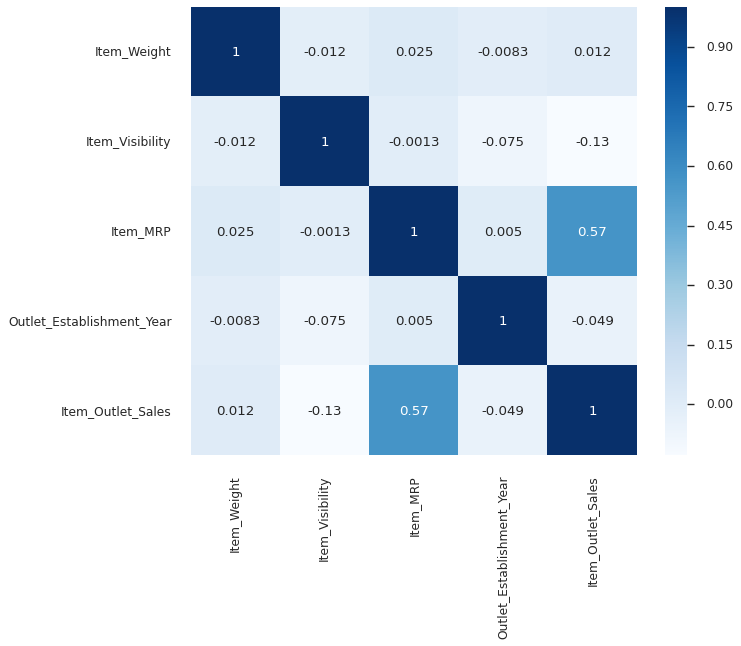

In [353]:
sns.set(rc = {'figure.figsize' : (9,7)});
sns.heatmap(corr, cmap = 'Blues', annot = True);

**Observations:**
- I see that Item_MRP and Item_Outlet Sales have good correlation at 0.57.
- Most other columns have very weak correlation, almost below 0.1, and some even have negative correlation like Item_MRP and Item_Visibility. 

**Exploring Item_MRP and Item_Outlet_Sales** 

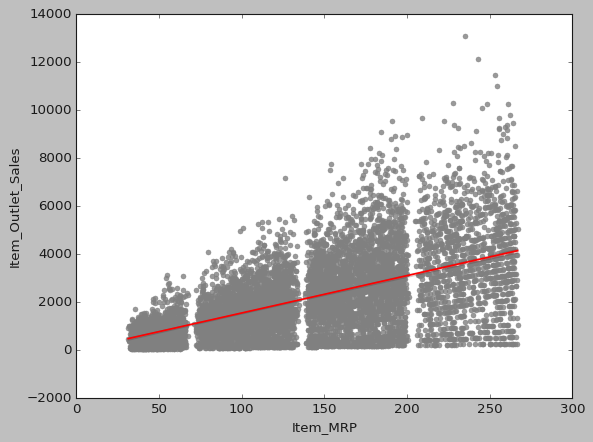

In [354]:
sns.set(rc={'figure.figsize':(18,8)})
plt.style.use('classic')
sns.regplot(data = df, x = df['Item_MRP'], y = df['Item_Outlet_Sales'], scatter_kws={"color":"grey"}, line_kws={"color":"red"});

***Observations:***
- We can see that the data is concentrated mostly before x = 200. 
- After x = 200, the data starts to be less concentrated and have more outliers. This would point to the fact that the higher the item's MRP is, the amount of sales it does becomes less predictable. 

**Item_MRP:**

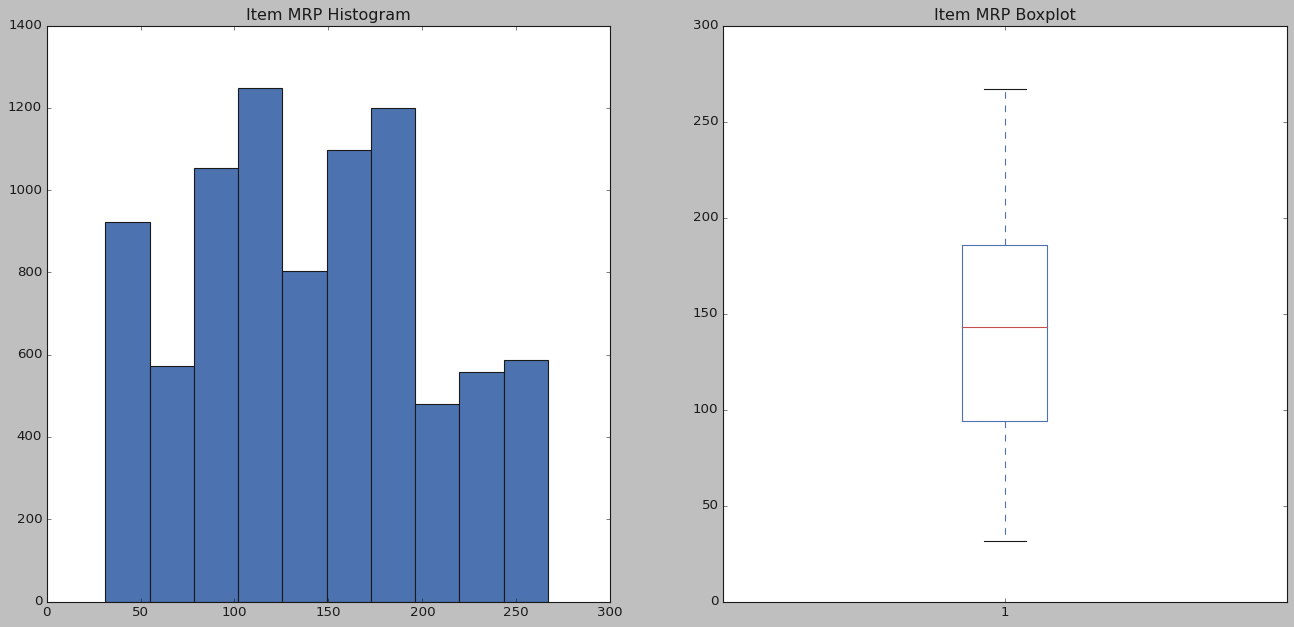

In [355]:
plt.figure(figsize = (20,9))

#Histogram
plt.subplot(1, 2, 1);
plt.hist(df['Item_MRP'].values);
plt.title('Item MRP Histogram');

#Boxplot
plt.subplot(1, 2, 2);
plt.boxplot(df['Item_MRP'].values);
plt.title('Item MRP Boxplot');

**Item_MRP Observation:** 
- Looking at the Item_MRP histogram, we can see that it is very spread out. There is no skewness or any uniform curve to it. We can also conclude that most of the information is between x = 75 and x = 190. 
- The boxplot shows us that this variable has no outliers. It's mean is around 140.

**Item_Outlet_Sales:**

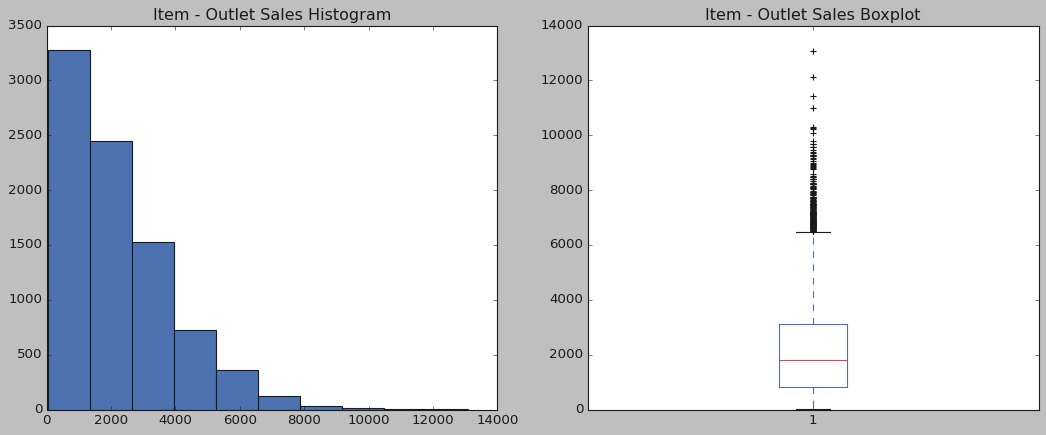

In [356]:
plt.figure(figsize = (16,6))

#Histogram:
plt.subplot(1,2,1);
plt.hist(df['Item_Outlet_Sales'].values);
plt.title('Item - Outlet Sales Histogram');

#Boxplot:
plt.subplot(1,2,2);
plt.boxplot(df['Item_Outlet_Sales'].values);
plt.title('Item - Outlet Sales Boxplot');

**Item - Outlet Sales Observations:**
- The histogram is heavily right skewed. 
- The boxplot shows us that there are multiple outliers, for example, one of the item did a sale of more than 12000 units. The average sale is around 1900. 

**Exploring Item_Fat_Content & Item Outlet Sales:**

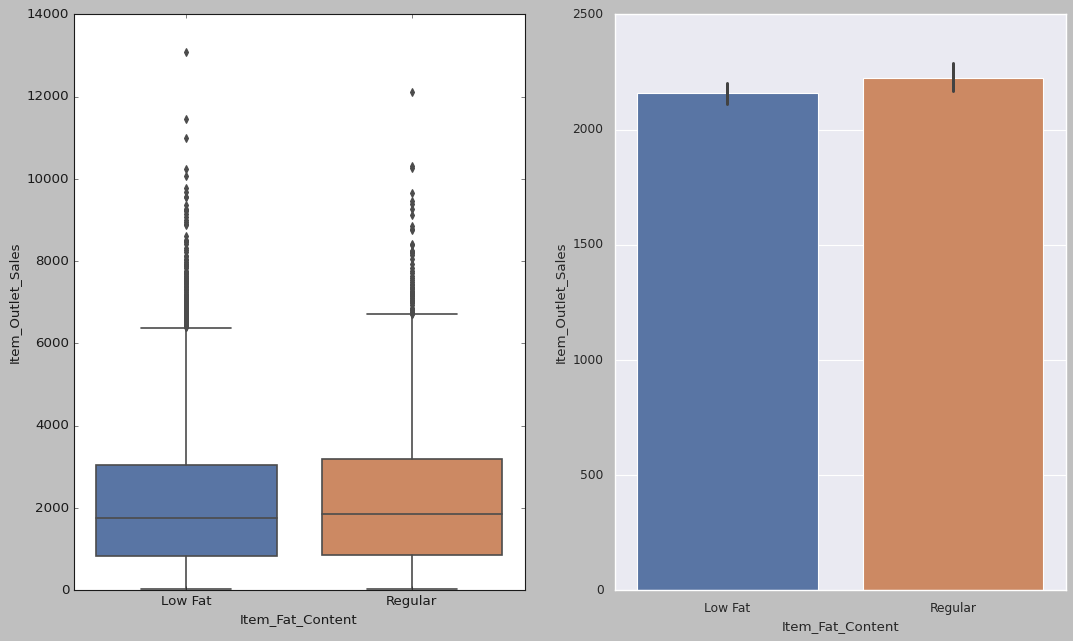

In [357]:
plt.figure(figsize = (16,9));

plt.subplot(1,2,1)
sns.set(rc={'figure.figsize':(10,5)})
sns.boxplot(data = df, x = 'Item_Fat_Content', y = 'Item_Outlet_Sales');

plt.subplot(1,2,2)
sns.set(rc={'figure.figsize':(10,9)})
sns.barplot(data = df, x = 'Item_Fat_Content', y = 'Item_Outlet_Sales');

**Observations:**
- In the boxplot, we can see that Low fat content items do have more spread out outliers, including the largest sale. 
- In the boxplot, we can also see that the IQR and maximum sales of Regular fat content items are larger compare to Low fat content items. 
- In the barplot, we can see that on average Regular fat content items sold more than the Low fat content items. 

**Item Fat Content & Item MRP**

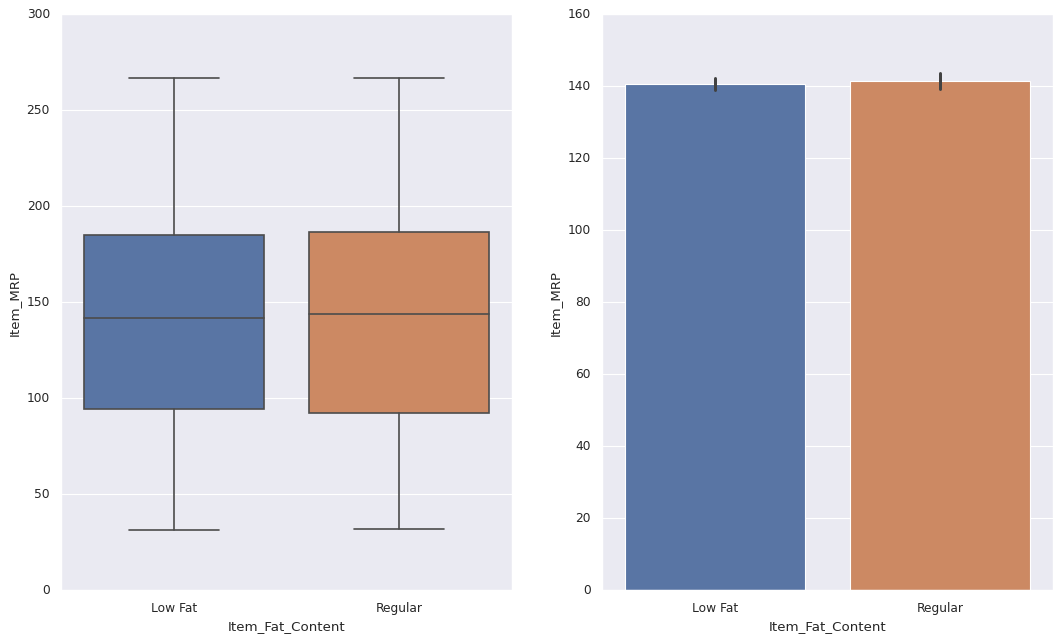

In [358]:
plt.figure(figsize = (16,9));

plt.subplot(1,2,1)
sns.set(rc={'figure.figsize':(10,5)})
sns.boxplot(data = df, x = 'Item_Fat_Content', y = 'Item_MRP');

plt.subplot(1,2,2)
sns.set(rc={'figure.figsize':(10,9)})
sns.barplot(data = df, x = 'Item_Fat_Content', y = 'Item_MRP');

**Observations:**
- In the boxplot, we can see that the IQR is larger for Regular Fat content items, meaning that some of these items are priced a little lower than the low fat content and others are priced a little higher. 
- In the barplot, we can see that on average Regular fat content items are a little more expensive.  

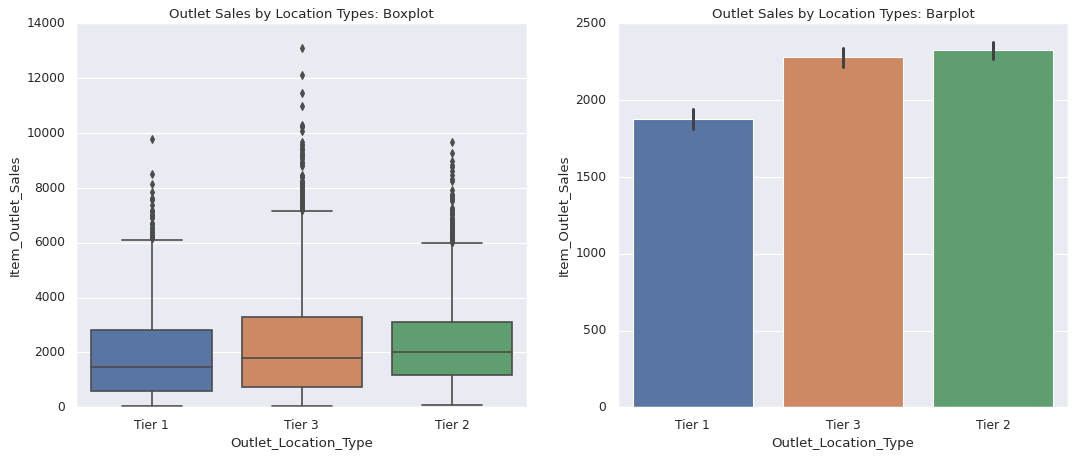

In [359]:
plt.figure(figsize = (16,6))

plt.subplot(1,2,1);
sns.set(rc={'figure.figsize':(9,7)});
sns.boxplot(data = df, x = 'Outlet_Location_Type', y = 'Item_Outlet_Sales').set(title = 'Outlet Sales by Location Types: Boxplot');

plt.subplot(1,2,2);
sns.set(rc={'figure.figsize':(9,7)});
sns.barplot(data = df, x = 'Outlet_Location_Type', y = 'Item_Outlet_Sales').set(title = 'Outlet Sales by Location Types: Barplot');


**Observations:**
- In the boxplot, we can see that Tier 3 has more spread out outliers. This means that Tier 3 locations have done the largest sale of any other location.  
- In the barplot, we see that Tier 2 has the most sales on average, even slightly more than Tier 3. 
- In the boxplot we can see that Tier 1 has a slightly higher maximum than Tier 2, but on average (see in the barplot) it has done fewer sales. 

**Outlet Sales and Outlet Types:**

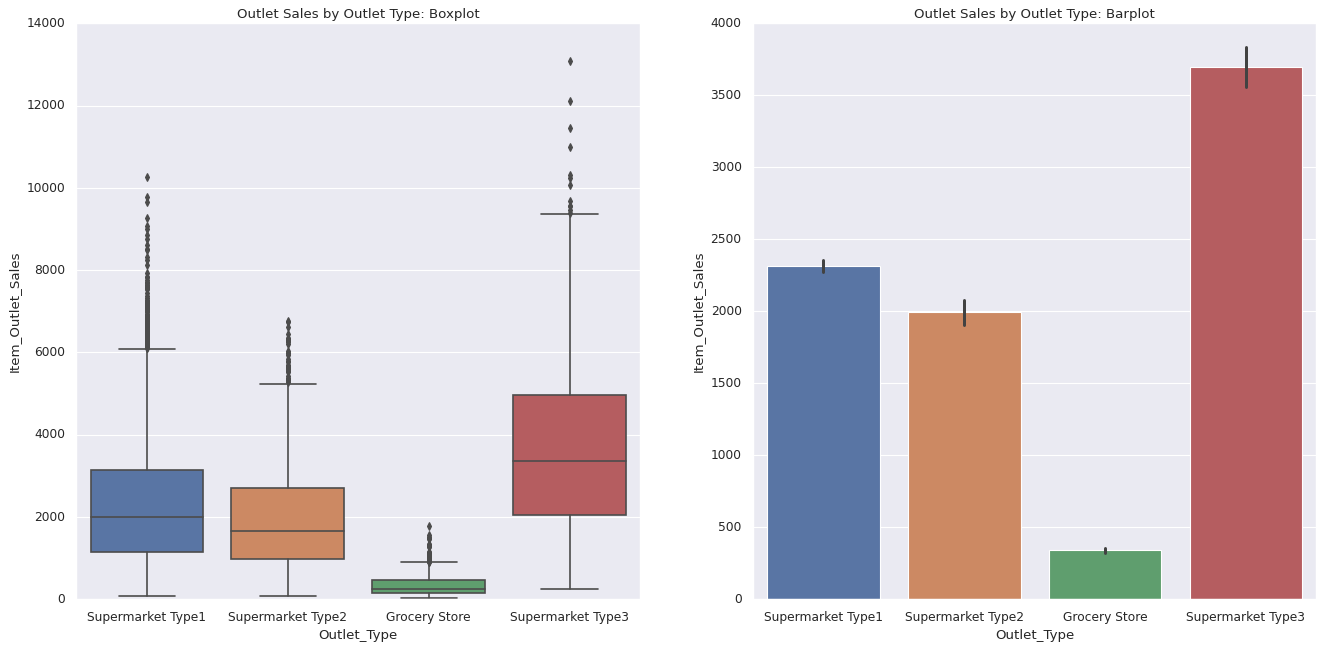

In [360]:
plt.figure(figsize = (20,9))

plt.subplot(1,2,1);

sns.set(rc={'figure.figsize':(9,7)});
sns.boxplot(data = df, x = 'Outlet_Type', y = 'Item_Outlet_Sales').set(title = 'Outlet Sales by Outlet Type: Boxplot');

plt.subplot(1,2,2);
sns.set(rc={'figure.figsize':(9,7)});
sns.barplot(data = df, x = 'Outlet_Type', y = 'Item_Outlet_Sales').set(title = 'Outlet Sales by Outlet Type: Barplot');

**Observations:**
- In the boxplot, we can see that Supermarket Type 3 does the most sales of all the other Outlet types, including some of the largest sales as well. 
- In both plots, we can see that Grocery Stores have some the least amount of sales, including the smallest average. 
- All Outlet types have outliers. 

## Explanatory Visuals

Talking to Stakholders:
- We need Type 3 supermarkets. 
- Tier 2 location types. 
- Focus more on regular fat items. 
- Have items with reasonable price as we will be better able to predict the sales, and not depend on seasonality or trends. 

Item price really affects the sales of an item. 

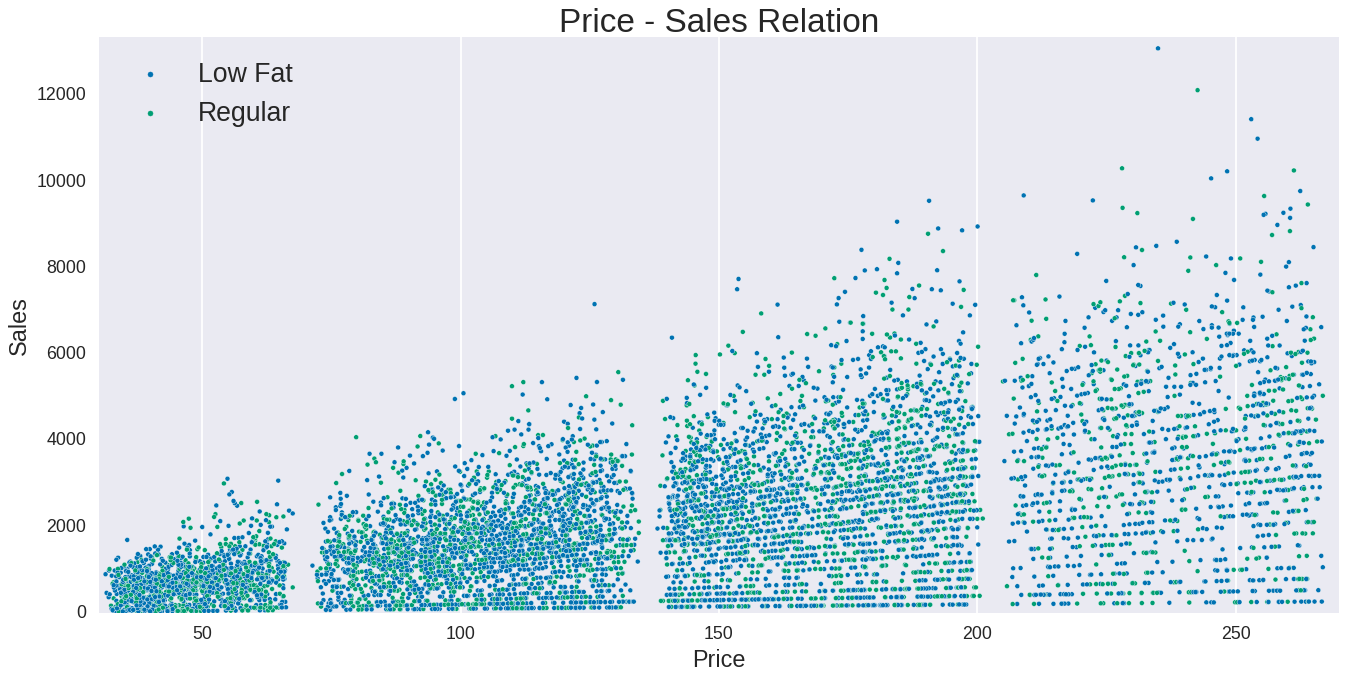

In [377]:
plt.figure(figsize = (20,9))
plt.style.use('seaborn-colorblind')
sns.scatterplot(data = df, x = 'Item_MRP', y = 'Item_Outlet_Sales', hue = 'Item_Fat_Content')
plt.ylim(bottom = 0, top = 13350)
plt.xlim(left = 30, right = 270)
plt.grid(axis = 'x')
plt.xlabel('Price', fontsize=21)
plt.ylabel('Sales', fontsize=21)
plt.title('Price - Sales Relation', fontsize = 30)
plt.legend(loc = 'top left',fontsize = 24);

In [362]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

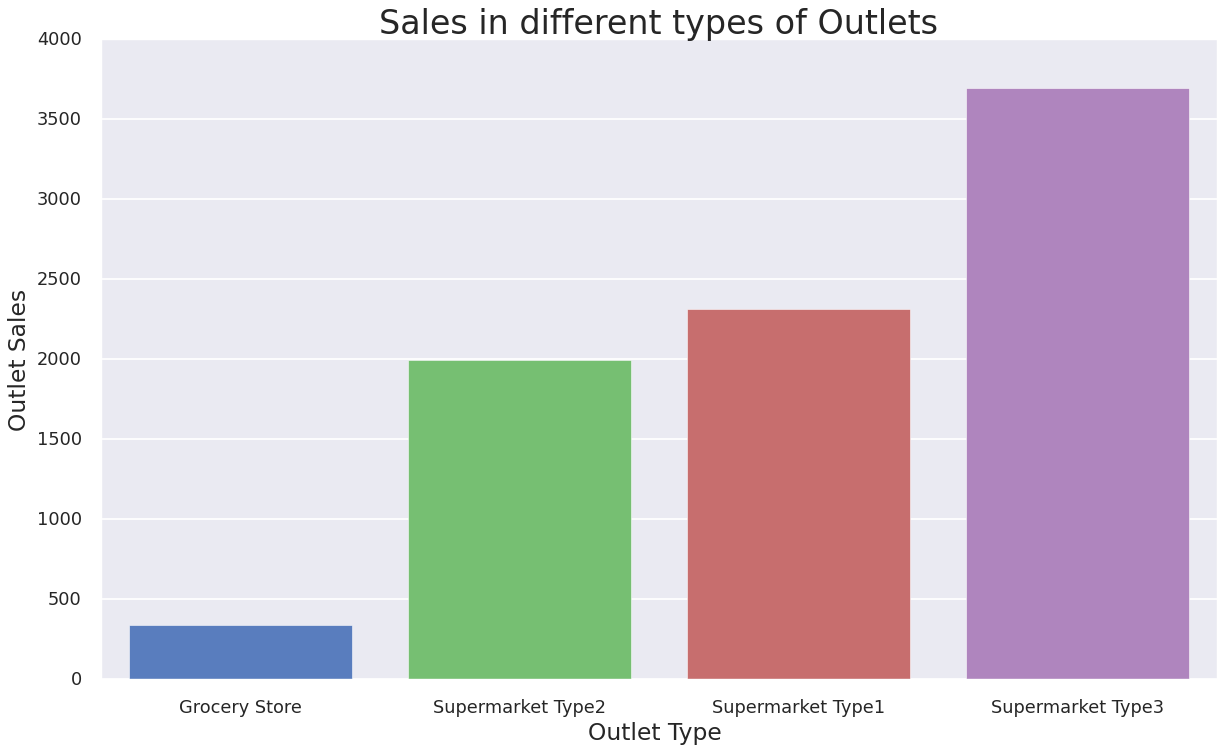

In [369]:
import numpy as np

plt.figure(figsize = (18,10))
plt.style.use('seaborn-muted')
sns.barplot(x = 'Outlet_Type', 
            y = 'Item_Outlet_Sales',
            ci = None,
            data = df,
            order = ['Grocery Store', 'Supermarket Type2', 'Supermarket Type1', 'Supermarket Type3'])
plt.ticklabel_format(style='plain', axis='y')
plt.title('Sales in different types of Outlets', fontsize=30)
plt.xlabel('Outlet Type ', fontsize=21)
plt.ylabel('Outlet Sales', fontsize=21);

Group by item type and get there sales. 

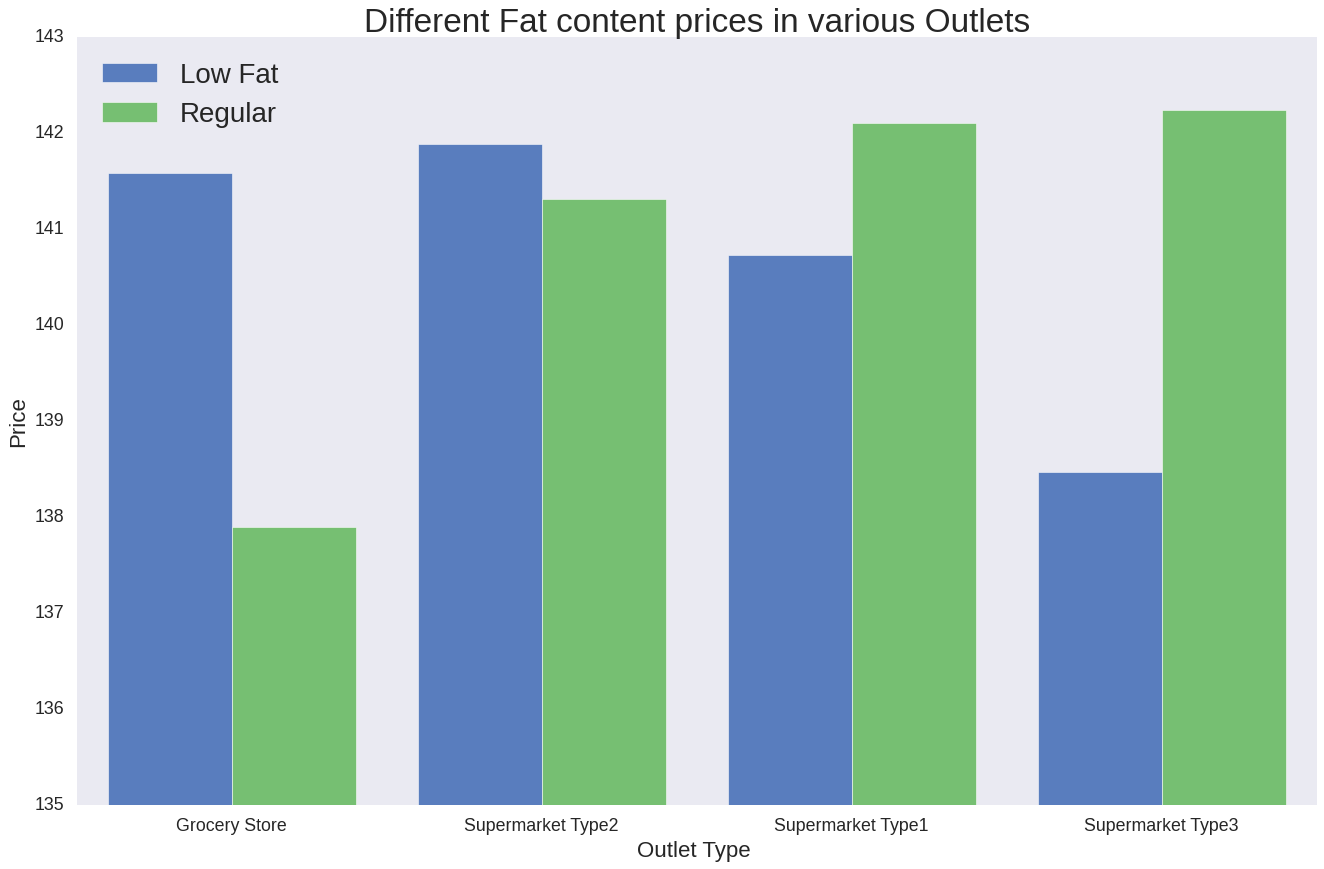

In [373]:
plt.figure(figsize = (20,12))
plt.style.use('seaborn-muted')
sns.barplot(x = 'Outlet_Type', y = 'Item_MRP', data = df, hue = 'Item_Fat_Content', ci = None,
            order = ['Grocery Store', 'Supermarket Type2', 'Supermarket Type1', 'Supermarket Type3'])
plt.ticklabel_format(style='plain', axis='y')
plt.title('Different Fat content prices in various Outlets', fontsize=30)
plt.xlabel('Outlet Type ', fontsize=20)
plt.ylabel('Price', fontsize=20)
plt.ylim(bottom = 135, top = 143)
plt.legend(fontsize = 25, loc = 'top left');

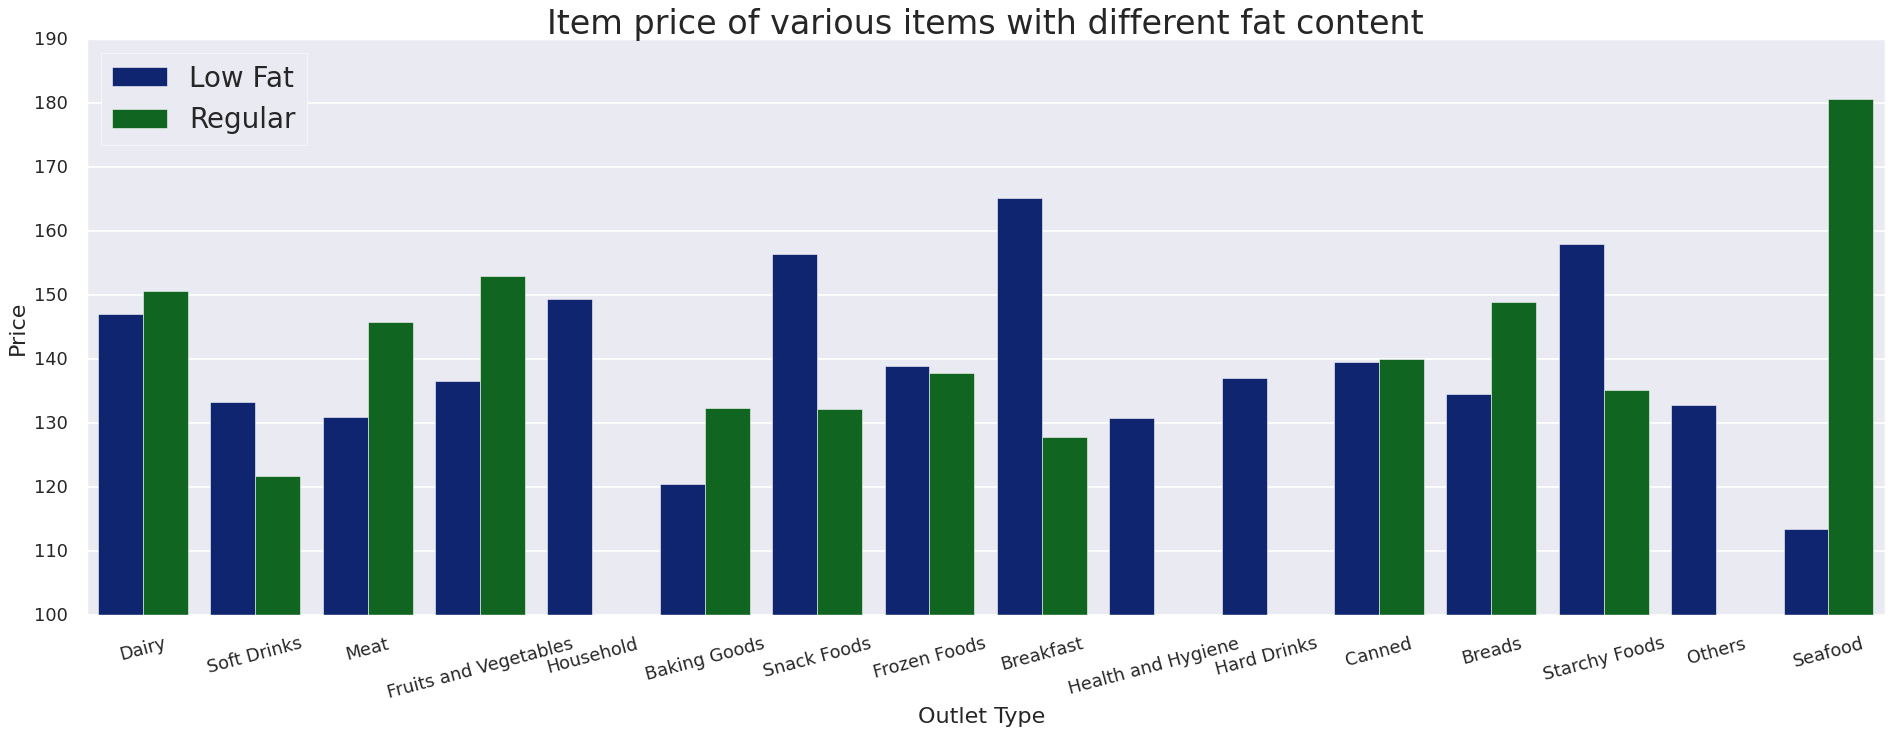

In [370]:


plt.figure(figsize = (29,9))
plt.style.use('seaborn-dark-palette')
sns.barplot(x = 'Item_Type', y = 'Item_MRP', data = df, hue= 'Item_Fat_Content', ci = None)
plt.xticks(rotation = 15)
plt.ticklabel_format(style='plain', axis='y')
plt.title('Item price of various items with different fat content', fontsize=30)
plt.xlabel('Outlet Type ', fontsize=20)
plt.ylabel('Price', fontsize=20)
plt.ylim(bottom = 100, top = 190)
plt.legend(loc= 'top left',fontsize = 25);
